In [75]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import statsmodels.api as sm2
import statistics as stat
import time
from numpy.random import normal
import seaborn as sns
import pylab
from scipy import optimize as opt
from scipy import stats as st
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from matplotlib.pyplot import figure
from sklearn.decomposition import PCA
from bisect import bisect_left
import timeit
import scipy 
import math
import pypfopt

In [76]:
df=pd.read_csv('https://raw.githubusercontent.com/dompazz/FinTech590-RiskManagement/main/Week03/Project/DailyReturn.csv')

In [77]:
df.head()

,Unnamed: 0,SPY,AAPL,MSFT,AMZN,TSLA,GOOGL,GOOG,FB,NVDA,...,PNC,MDLZ,MO,ADI,GILD,LMT,SYK,GM,TFC,TJX
0,2021/10/21,0.002608,0.001474,0.010897,0.005842,0.032571,0.000825,0.002566,0.003228,0.026648,...,-0.000329,-0.002156,-0.004130,0.010683,0.001944,0.005416,0.009789,0.012832,-0.004696,0.012841
1,2021/10/22,-0.001036,-0.005285,-0.005149,-0.028955,0.017539,-0.030443,-0.029104,-0.050515,0.001498,...,0.015748,0.005984,-0.000207,-0.002181,0.003732,0.003913,-0.002568,-0.010957,0.013526,-0.008040
2,2021/10/25,0.005363,-0.000336,-0.003332,-0.004551,0.126616,-0.000869,0.001068,0.012569,0.019361,...,0.002221,-0.002974,-0.005599,0.011770,0.006395,0.004618,-0.009720,-0.000173,0.002017,0.017145
3,2021/10/26,0.000900,0.004575,0.006426,0.016775,-0.006274,0.013543,0.006478,-0.039186,0.066952,...,-0.002263,0.008121,0.003337,-0.003545,0.000887,-0.118035,0.000476,-0.006752,-0.002013,0.001073
4,2021/10/27,-0.004430,-0.003148,0.042114,0.004864,0.019078,0.049595,0.048367,-0.011368,-0.010762,...,-0.014625,-0.007233,-0.012679,-0.052368,-0.014174,-0.002922,-0.017132,-0.054210,-0.022191,-0.011786


In [78]:
df=df.iloc[:,df.columns !="Unnamed: 0" ]

In [79]:
df.shape

(60, 101)

# Problem1

In [80]:
#Function that calculate the exponential weight
def populateWeights(x,w,cw, λ):
    n = len(x)
    tw = 0.0
    for i in range(1,n+1):
        x[i-1] = i
        w[i-1] = (1-λ)*λ**i
        tw += w[i-1]
        cw[i-1] = tw
        
    for i in range(1,n+1):
        w[i-1] = w[i-1]/tw
        cw[i-1] = cw[i-1]/tw


#Function that generate the exponentially weighted covariance matrix
def out_put_EWCM(w,n):
    cov_matrix = np.zeros([n,n])
    for i in range (df.shape[0]):
        for j in range (n):
            df.iloc[i,j] = df.iloc[i,j] - np.mean(df.iloc[:,j])
    
            
    for i in range (n):
        for j in range (n):
            temp = w * df.iloc[:,i]
            cov_matrix[i,j] = np.dot(temp, df.iloc[:, j])
            
    return cov_matrix

#general PCA implementation
def PCA(cov):
    eig_val, eig_vec = np.linalg.eigh(cov)
    eig_val = sorted(eig_val, reverse = True)
    total = np.sum(eig_val)
    sum= 0
    explianed_var = []
    for i in range(len(eig_val)):
        if eig_val[i] < 0:
            break
        sum += eig_val[i]
        explianed_var.append(sum/total)
    return np.array(explianed_var)
    
#Function that return an array of variances_explained by each eigen value
def variances_explained(ewcm):
    eig_vals,eig_vecs=np.linalg.eigh(ewcm)
    explained_variances = []
    for i in range(len(eig_vals)):
        explained_variances.append(eig_vals[i] / np.sum(eig_vals))
    return np.flip(explained_variances)

#Function that return an array of cumulative variances_explained by each eigen value

def cum_variances_explained(ewcm):
    cum=[0.0]*df.shape[1]
    explained_variances=variances_explained(ewcm)
    sum=0
    for i in range(1,df.shape[1]+1):
        sum=sum+explained_variances[i-1]
        cum[i-1]=sum
    return cum
        
    
 
    
    
    

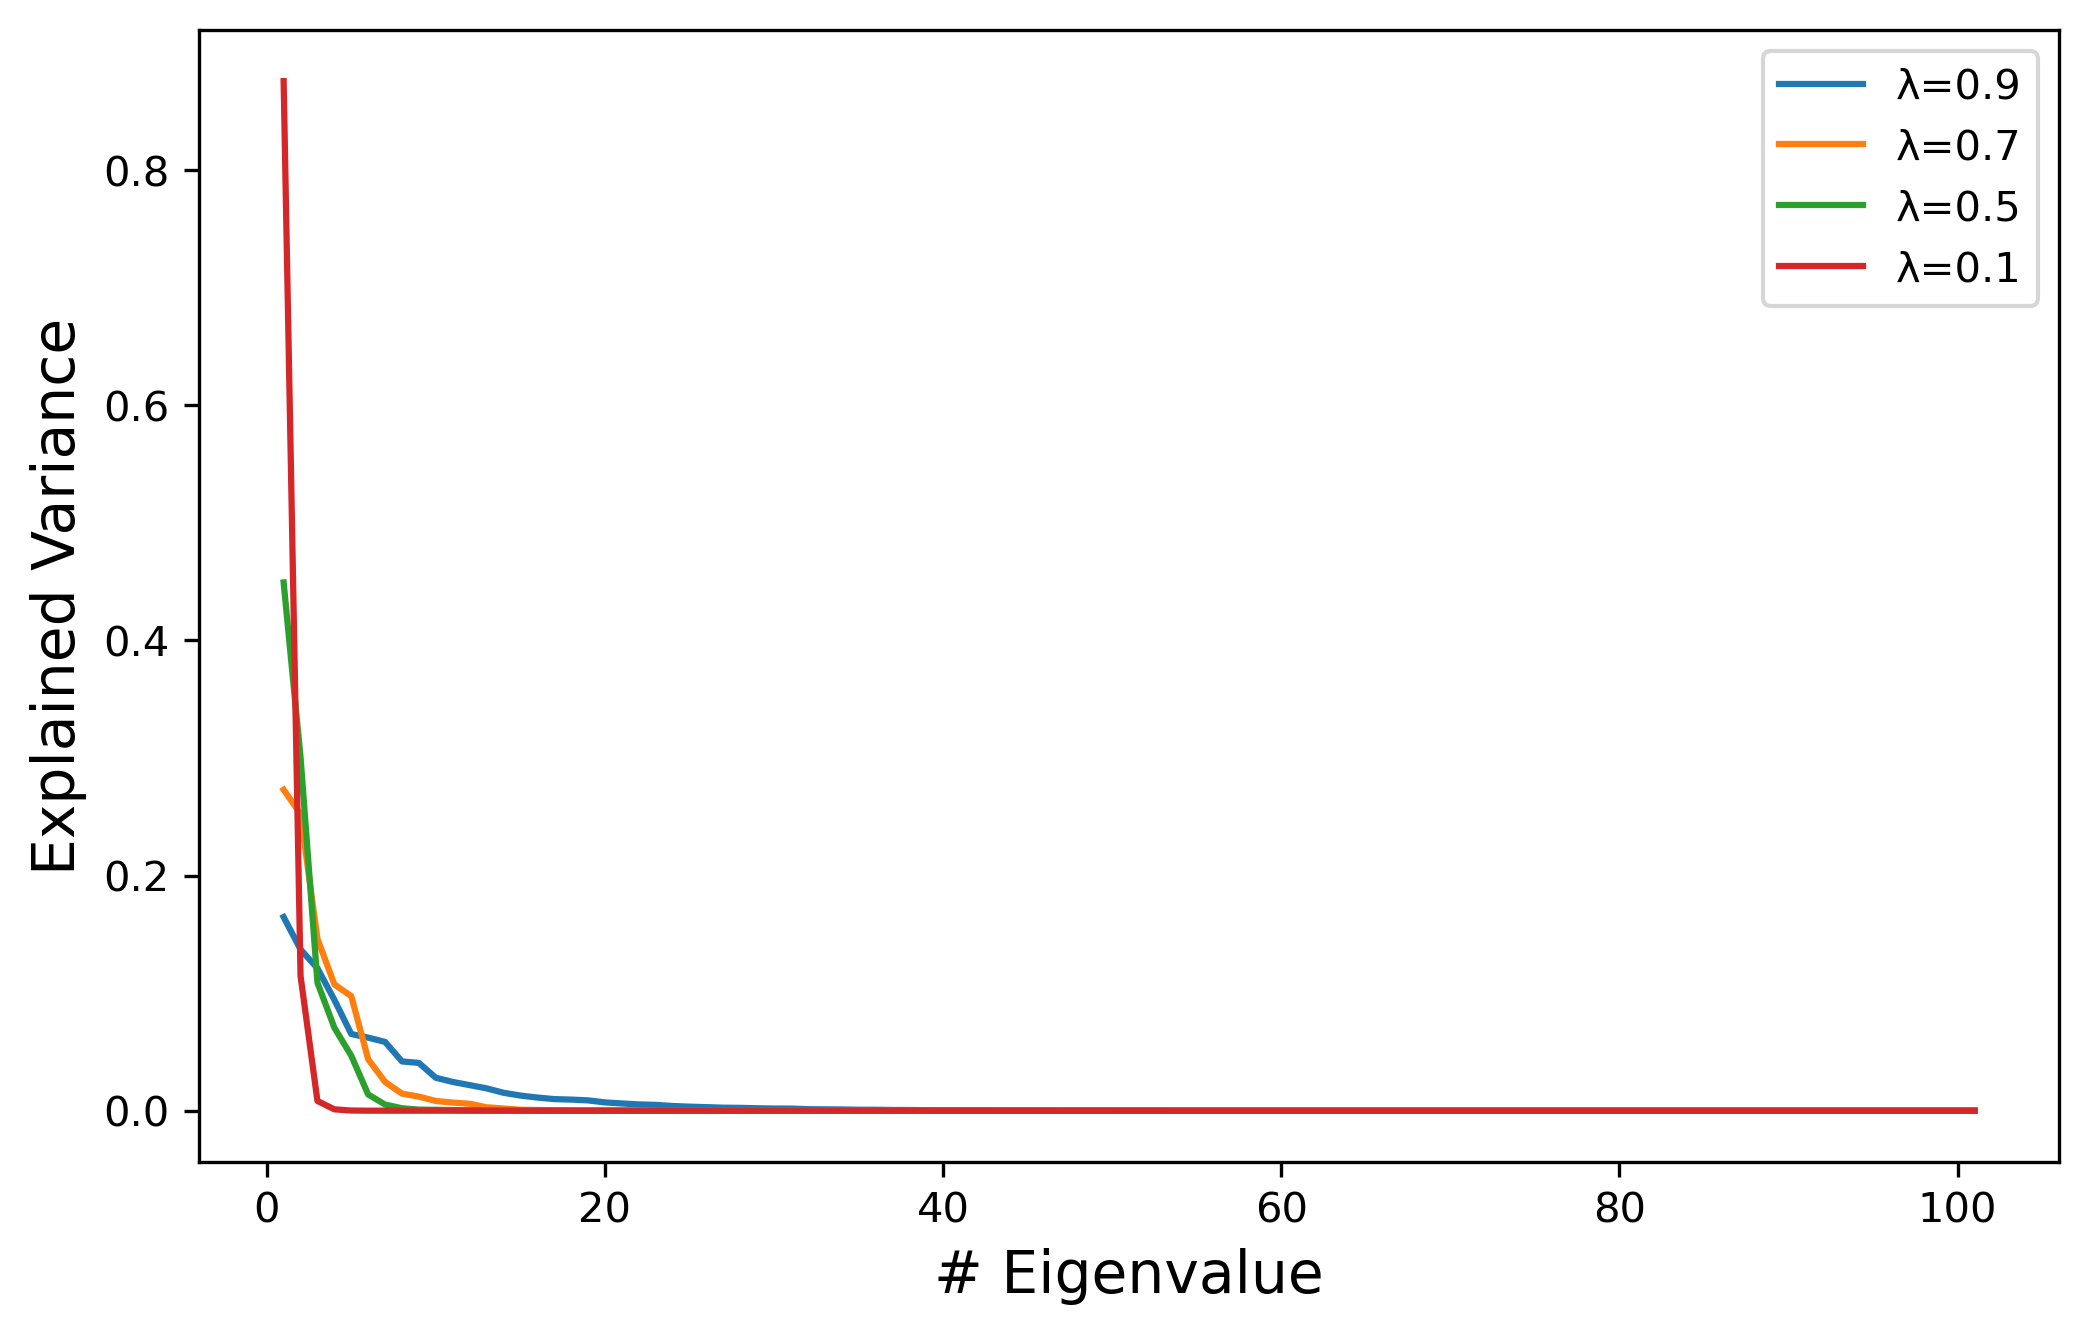

In [81]:
# generate variable to store calculated exp wights and cumulative weight for each price
n=df.shape[0]
x=[0.0] * n
w=[0.0] * n
cw=[0.0] * n
#cum=[0.0] * df.shape(1)

populateWeights(x,w,cw,0.1)
ewcm_10=out_put_EWCM(w,df.shape[1])

populateWeights(x,w,cw,0.3)
ewcm_30=out_put_EWCM(w,df.shape[1])

populateWeights(x,w,cw,0.5)
ewcm_50=out_put_EWCM(w,df.shape[1])

populateWeights(x,w,cw,0.7)
ewcm_70=out_put_EWCM(w,df.shape[1])

populateWeights(x,w,cw,0.9)
ewcm_90=out_put_EWCM(w,df.shape[1])

populateWeights(x,w,cw,0.97)
ewcm_97=out_put_EWCM(w,df.shape[1])



x=[0.0]*df.shape[1]
for i in range(1,df.shape[1]+1):
        x[i-1] = i
     

figure(figsize = (8, 5), dpi = 300)

#plt.plot(x, variances_explained(ewcm_97), label = "λ=0.97")
plt.plot(x, variances_explained(ewcm_90), label = "λ=0.9")
plt.plot(x, variances_explained(ewcm_70), label = "λ=0.7")
plt.plot(x, variances_explained(ewcm_50), label = "λ=0.5")
#plt.plot(x, variances_explained(ewcm_30), label = "λ=0.3")
plt.plot(x, variances_explained(ewcm_10), label = "λ=0.1")
plt.xlabel('# Eigenvalue', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.legend()
plt.show()


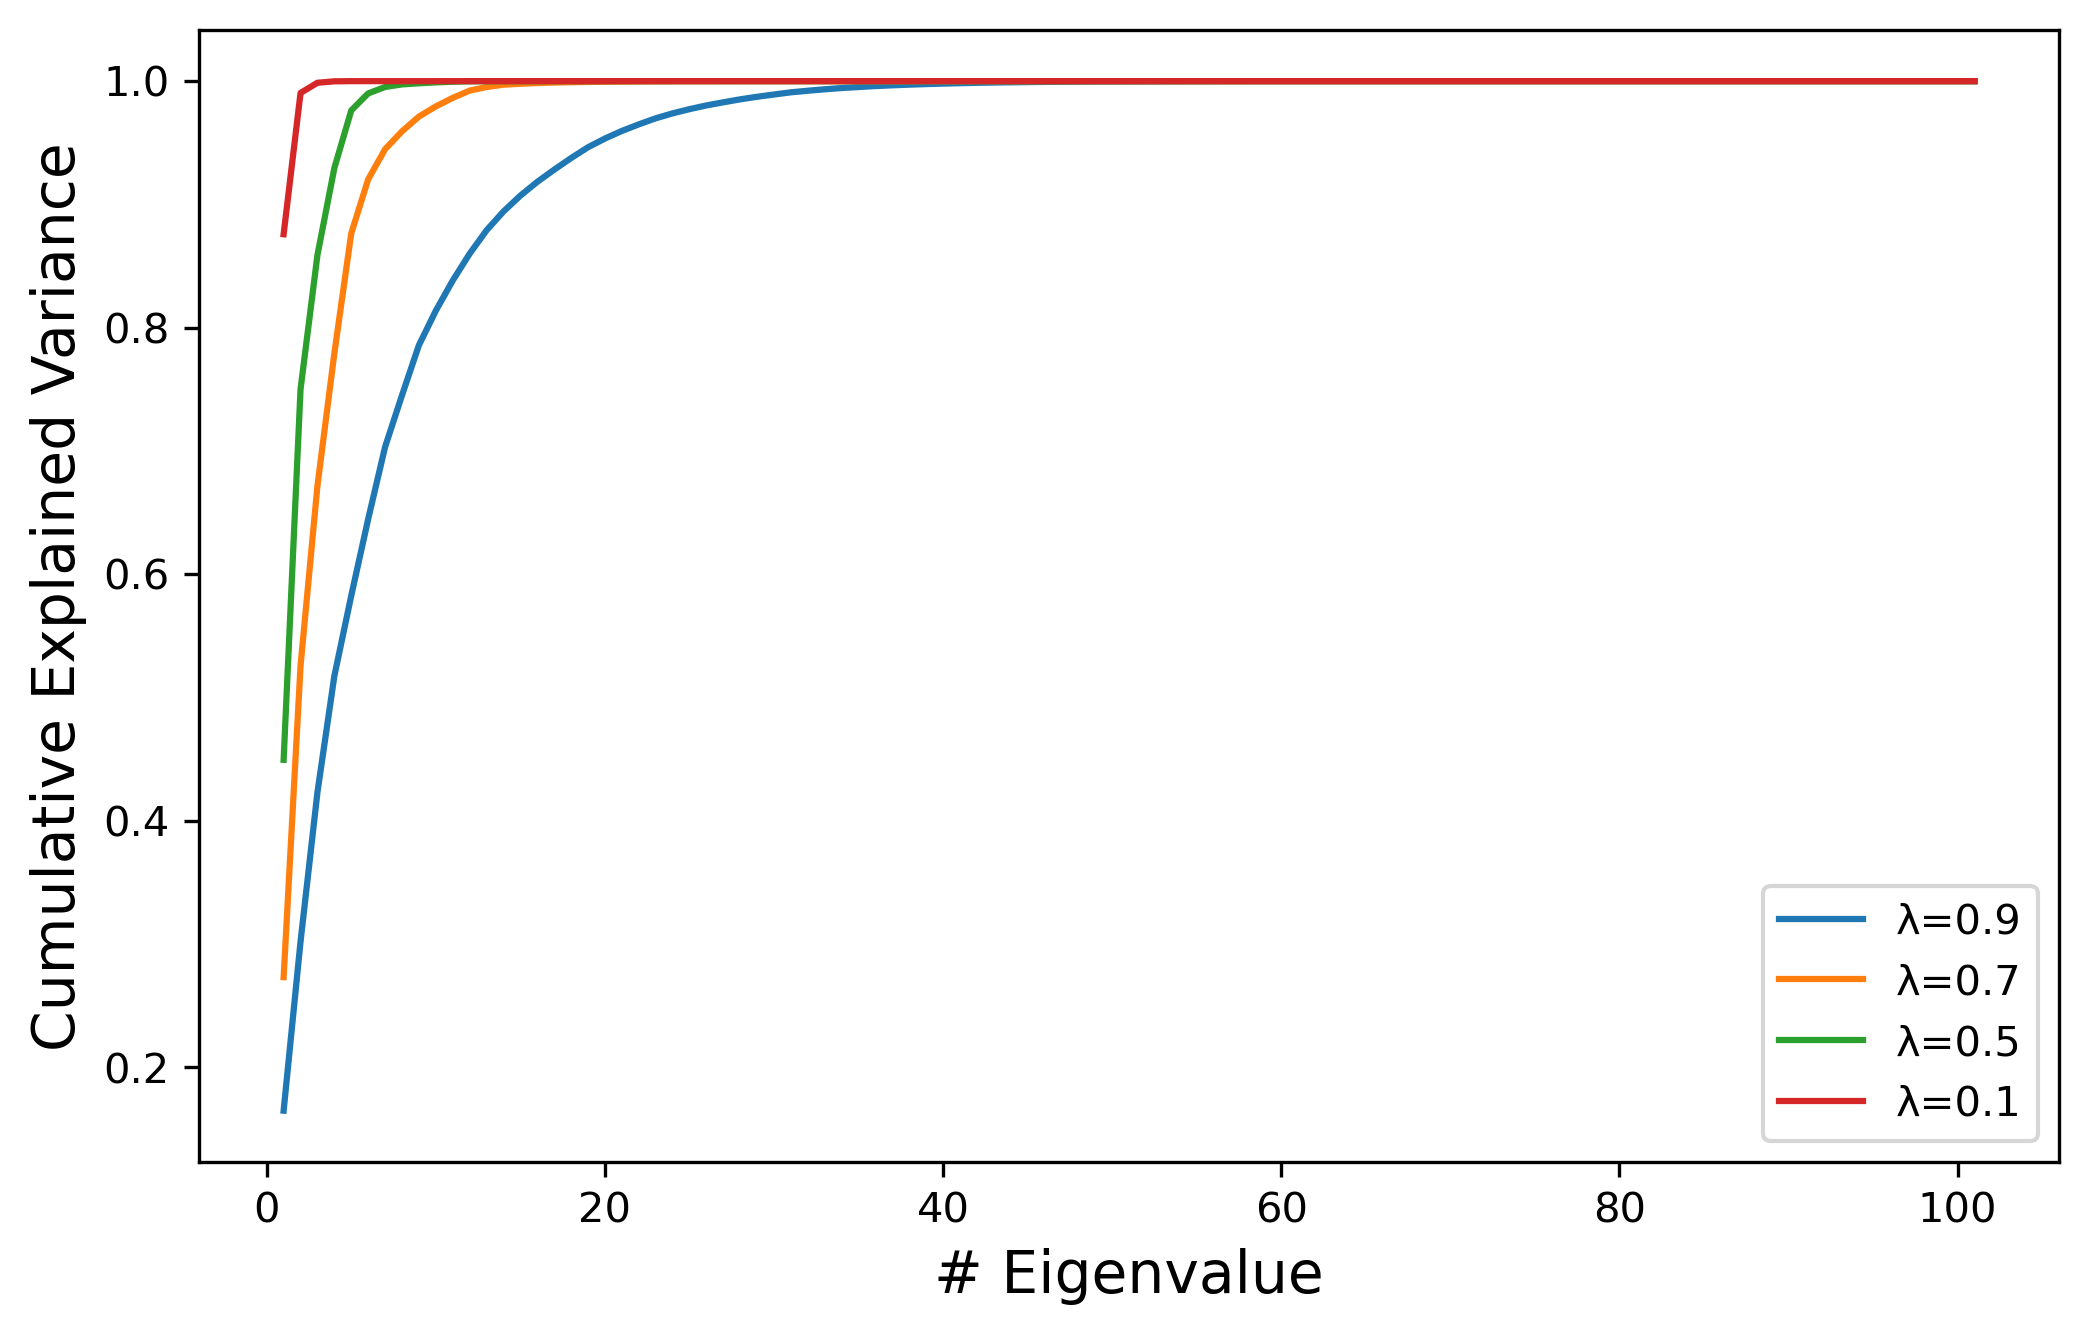

In [82]:
figure(figsize = (8, 5), dpi = 300)
#plt.plot(x, variances_explained(ewcm_97), label = "λ=0.97")
plt.plot(x, cum_variances_explained(ewcm_90), label = "λ=0.9")
plt.plot(x, cum_variances_explained(ewcm_70), label = "λ=0.7")
plt.plot(x, cum_variances_explained(ewcm_50), label = "λ=0.5")
#plt.plot(x, variances_explained(ewcm_30), label = "λ=0.3")
plt.plot(x, cum_variances_explained(ewcm_10), label = "λ=0.1")
plt.xlabel('# Eigenvalue', fontsize=14)
plt.ylabel('Cumulative Explained Variance', fontsize=14)
plt.legend()
plt.show()


# Problem 2

In [83]:
sigma=np.array([[1.0,0.0,0.0,0.0,0.0],
                [0.9,1.0,0.9,0.9,0.9],
                [0.9,0.9,1.0,0.9,0.9],
                [0.9,0.9,0.9,1.0,0.9],
                [0.9,0.9,0.9 ,0.9 ,1.0]])

root=np.array([[ 2.33936e-314,2.33936e-314,2.33936e-314,2.33936e-314,2.33936e-314],
               [2.33936e-314,2.33936e-314,2.33936e-314,2.33936e-314,2.33936e-314],
               [ 2.33936e-314,2.33936e-314,2.33936e-314,2.33936e-314,2.33936e-314],
               [2.33936e-314,2.33936e-314,2.33936e-314,2.33936e-314,2.33936e-314],
               [2.33936e-314,2.33936e-314,2.33936e-314,2.33936e-314,2.33936e-314]])

#function to calc forbenius norm
def frobenius_norm(matrix):
    return np.square(matrix).sum()

## 2.1 Cholesky 

In [84]:
#Take in Numpy.ndarray,return a np.matrix
def chol_psd(sigma):
    root=np.full(sigma.shape,0.0,dtype="float64")
    n=root.shape[1]
    
    #loop over columns
    for j in range(n):
        s = 0.0
        #if we are not on the first column, calculate the dot product of the preceeding row values.
        if j>0:
            s=root[j,0:(j)]@root[j,0:(j)] 
        temp = sigma[j][j] - s
        if -1e-8 <= temp <= 0:
            temp = 0.0

        root[j,j]=np.sqrt(temp)
        
        #Check for the 0 eigan value.  Just set the column to 0 if we have one
        if root[j,j]==0.0:
            continue
        for i in range(j+1, n):
            root[i, j] = (sigma[i,j] - root[i,:j] @ root[j,:j].T) / root[j, j] 
            
    return np.matrix(root)

## 2.2 Near_PSD

In [55]:
#Near PSD Matrix
def near_psd(A,epsilon=0.0):
    n = A.shape[0]
    invSD = None
    out=A.copy()
    #calculate the correlation matrix if we got a covariance
    if sum(np.diag(out)==1)!=n:
        invSD=np.diag(1/np.sqrt(np.diag(out)))
        out=(invSD@out)@invSD
    #SVD, update the eigen value and scale
    vals,vecs=np.linalg.eigh(out)
    vals=np.maximum(vals,epsilon)
    T=1/((vecs*vecs)@vals)
    T=np.diag(np.sqrt(T))
    l=np.diag(np.sqrt(vals))
    B=(T@vecs)@l
    out=B@B.T
    
    if invSD != None:
        invSD = np.diag(1/np.diag(invSD))
        out = invSD * out * invSD
    return(out)
   

In [56]:
near_psd(sigma)

array([[1. , 0.9, 0.9, 0.9, 0.9],
       [0.9, 1. , 0.9, 0.9, 0.9],
       [0.9, 0.9, 1. , 0.9, 0.9],
       [0.9, 0.9, 0.9, 1. , 0.9],
       [0.9, 0.9, 0.9, 0.9, 1. ]])

In [57]:
# test near_psd
n = 5
sigma = np.full((n, n), 0.9)
np.fill_diagonal(sigma, 1)
sigma[0, 1] = 0.7357  
sigma[1, 0] = 0.7357  

res = near_psd(sigma)
ans =  np.matrix([[1.0,       0.735701,  0.899997,  0.899997,  0.899997],
                  [0.735701,  1.0,       0.899997,  0.899997,  0.899997],
                  [0.899997,  0.899997,  1.0,       0.9,       0.9],
                  [0.899997,  0.899997,  0.9,       1.0,       0.9],
                  [0.899997,  0.899997,  0.9,       0.9,       1.0]])
abs(res - ans).sum() < 1e-5

True

## 2.3 Higham

In [58]:
def proj_u(matrix):
    corr = matrix.copy()
    np.fill_diagonal(corr, 1)
    return corr


def proj_s(matrix):
    eig_vals, eig_vecs = np.linalg.eigh(matrix)
    eig_vals[eig_vals < 0] = 0
    return eig_vecs @ np.diag(eig_vals) @eig_vecs.T


def higham_nearestPSD(corr, tolerance=1e-9):
    # Δ𝑆0 = 0, 𝑌0 = 𝐴, γ0 = 𝑚𝑎𝑥 𝐹𝑙𝑜𝑎𝑡
    dS = 0
    y = corr
    pre_gamma = float("inf")

    # 𝐿𝑜𝑜𝑝 𝑘 ∈ 1... 𝑚𝑎𝑥 𝐼𝑡𝑒𝑟𝑎𝑡𝑖𝑜𝑛𝑠
    iter=100
    for i in range(iter):
        r = y - dS          # 𝑅𝑘 = 𝑌𝑘−1 − Δ𝑆𝑘−1
        x = proj_s(r)      # 𝑋𝑘 = 𝑃𝑆(𝑅𝑘)
        dS = x - r          # Δ𝑆𝑘 = 𝑋𝑘 − 𝑅𝑘
        y = proj_u(x)      # 𝑌𝑘 = 𝑃𝑈(𝑋𝑘)
        gamma = frobenius_norm(y - corr)
        
        # 𝑖𝑓 |γ𝑘−1 − γ𝑘 |< 𝑡𝑜𝑙 𝑡ℎ𝑒𝑛 𝑏𝑟𝑒𝑎𝑘
        if abs(gamma - pre_gamma) < tolerance:  
            break
        pre_gamma = gamma
    
    return y

In [59]:
n = 5
sigma = np.full((n, n), 0.9)
np.fill_diagonal(sigma, 1)
sigma[0, 1] = 0.7357  
sigma[1, 0] = 0.7357  
higham_nearestPSD(sigma)

array([[1.        , 0.73570337, 0.89999783, 0.89999783, 0.89999783],
       [0.73570337, 1.        , 0.89999783, 0.89999783, 0.89999783],
       [0.89999783, 0.89999783, 1.        , 0.90000139, 0.90000139],
       [0.89999783, 0.89999783, 0.90000139, 1.        , 0.90000139],
       [0.89999783, 0.89999783, 0.90000139, 0.90000139, 1.        ]])

In [60]:
# test Higham ear_psd
n = 5
sigma = np.full((n, n), 0.9)
np.fill_diagonal(sigma, 1)
sigma[0, 1] = 0.7357  
sigma[1, 0] = 0.7357  

res = higham_nearestPSD(sigma)
ans =  np.matrix([[1.0,       0.735701,  0.899997,  0.899997,  0.899997],
                  [0.735701,  1.0,       0.899997,  0.899997,  0.899997],
                  [0.899997,  0.899997,  1.0,       0.9,       0.9],
                  [0.899997,  0.899997,  0.9,       1.0,       0.9],
                  [0.899997,  0.899997,  0.9,       0.9,       1.0]])
abs(res - ans).sum() < 1e-4

True

## 2.4 Compare Time and Accuracy

In [61]:
# Generate non_psd 500*500 matrix
n = 500
sigma = np.full((n, n), 0.9)
np.fill_diagonal(sigma, 1)
sigma[1, 2] = 0.7357  
sigma[2, 1] = 0.7357  

In [62]:
#function that confirm that the output is psd
def is_psd(matrix,tolerance=1e-8):
    if abs(matrix-matrix.T).sum()>tolerance:
        print("The our put is not psd")
    eig_val,eig_vec=np.linalg.eigh(matrix)
    if(all(eig_val)>-tolerance):
        print("The out put is psd")

In [63]:
#confirm that the output of near_psd is psd
matrix_p=near_psd(sigma,epsilon=0.0)
is_psd(matrix_p)

The out put is psd


In [64]:
#confirm that the output o higham is psd
matrix_h=higham_nearestPSD(sigma)
is_psd(matrix_h)

The out put is psd


In [65]:
#calc forbenius norm
forb_psd=np.sum((sigma-matrix_p)**2)
#forb_norm(matrix_p-sigma)
forb_higham=np.sum((sigma-matrix_h)**2)
#forb_norm(matrix_h-sigma)
print(forb_psd,forb_higham)


0.393784683497671 0.008036762460391129


In [66]:
#calc running time
start_time = time.time()
near_psd(sigma)
time_near_psd=(time.time() - start_time)

start_time = time.time()
higham_nearestPSD(sigma)
time_higham=(time.time() - start_time)
print(time_near_psd,time_higham)

0.16225385665893555 2.2804317474365234


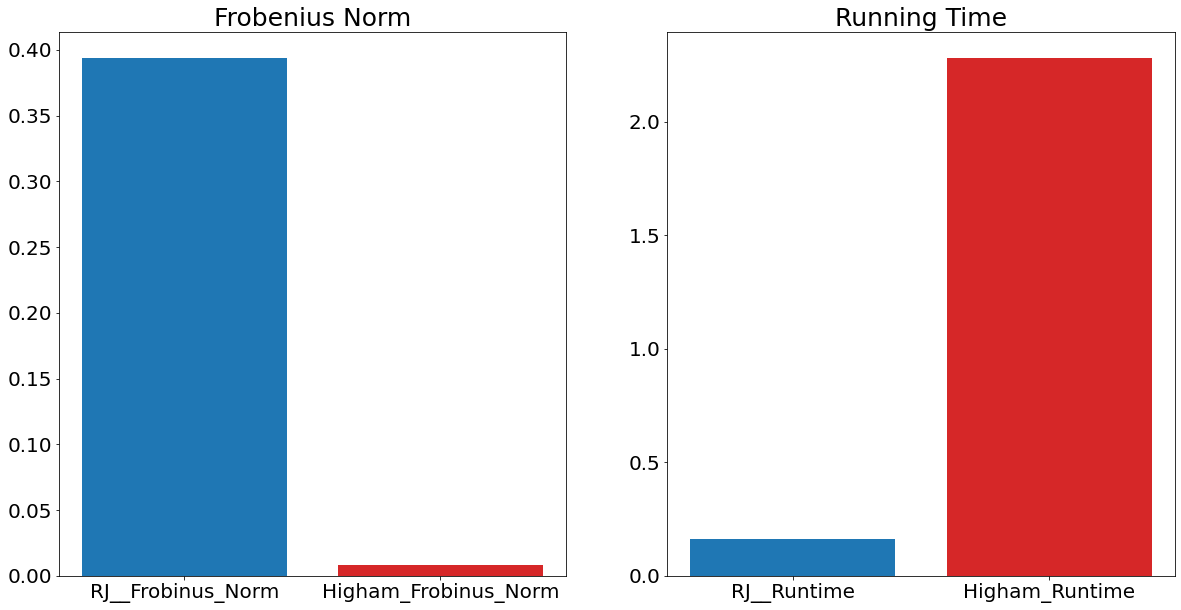

<Figure size 8000x5000 with 0 Axes>

In [67]:
#graph
fig,axes=plt.subplots(1,2,figsize=(20,10))
figure(figsize = (8, 5), dpi = 1000)
axes[0].bar(['RJ__Frobinus_Norm','Higham_Frobinus_Norm'],[forb_psd,forb_higham],color = ['#1f77b4','#d62728'])
axes[0].set_title('Frobenius Norm',fontsize=25)
axes[1].bar(['RJ__Runtime','Higham_Runtime'],[time_near_psd,time_higham],color = ['#1f77b4','#d62728'])
axes[1].set_title('Running Time',fontsize=25)
axes[0].tick_params(axis='both', which='major', labelsize=20)
axes[1].tick_params(axis='both', which='major', labelsize=20)

# Problem 3

In [85]:
def cal_std(cov):
    std = np.sqrt(np.diag(cov))
    return std

def cal_corr(cov):

    std = cal_std(cov)
    dg = np.diag(1/std)
    return dg@cov@dg.T

def cal_cov(std, corr):
    std = np.diag(std)
    return std@corr@std.T

#n=sample size
def Chol_sim(cov, n):
    d= np.random.normal(size = (cov.shape[0],n))
    chol= chol_psd(cov)
    return chol@d

def PCA_sim(cov, explained, size):
    explained_list = PCA(cov)
    track = 0
    n = len(cov)

    for i in range(len(explained_list)):
        if explained_list[i]>=explained-1e-8:
            track = i
            break
    eig_val, eig_vec = np.linalg.eigh(cov)
    eig_vec = eig_vec[:, (n-track-1):]
    eig_val = eig_val[(n-track-1):]

    X = eig_vec @ np.diag(np.sqrt(eig_val))
   
    return X@np.random.normal(size = (X.shape[1],size))

In [86]:
n=df.shape[0]
x=[0.0] * n
w=[0.0] * n
cw=[0.0] * n
populateWeights(x,w,cw,0.1)
cov = np.cov(df.T)
std = cal_std(cov)
corr = cal_corr(cov)
ewc = out_put_EWCM(w,df.shape[1])
ews = cal_std(ewc)
ewcor = cal_corr(ewc)

In [87]:
def run_time(func,*args, **kwargs):
    start = timeit.default_timer()
    rt = func(*args, **kwargs)
    end = timeit.default_timer()
    time = end-start
    return rt, time

<AxesSubplot:title={'center':'Frobenius Norm'}>

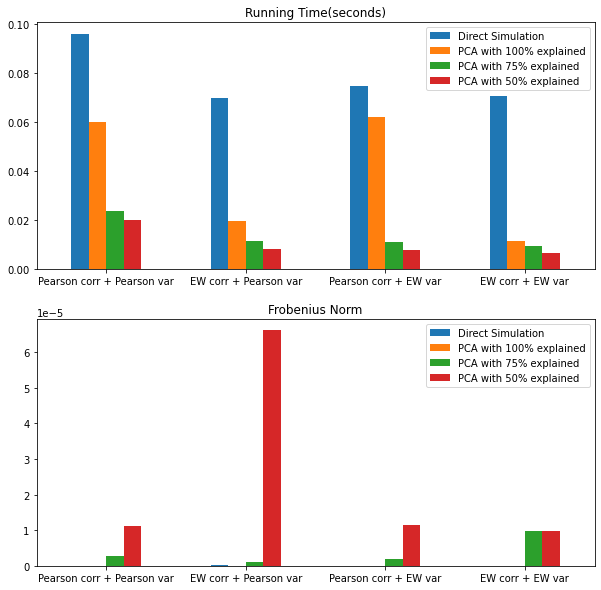

In [89]:
way = ["Pearson corr + Pearson var",
        "EW corr + Pearson var",
        "Pearson corr + EW var",
        "EW corr + EW var"]
sim = ["Direct Simulation",
        "PCA with 100% explained",
        "PCA with 75% explained",
        "PCA with 50% explained"]
percentage = [1.0,0.75,0.5]

# calculation/Visualization of Fnorm and running time
cov_list = []
RT_list = []
FN_list = []
cov_list.append(cal_cov(std,corr))
cov_list.append(cal_cov(std,ewcor))
cov_list.append(cal_cov(ews,corr))
cov_list.append(cal_cov(ews,ewcor))

for i, cov in enumerate(cov_list):
    RT = []
    FN = []
    mat_direct, time_direct = run_time(Chol_sim, cov, 25000)
    RT.append(time_direct)
    FN.append(frobenius_norm(cov-np.cov(mat_direct)))
    
    for p in percentage:
        mat_pca, time_pca = run_time(PCA_sim, cov, p,25000)
        RT.append(time_pca)
        FN.append(frobenius_norm(cov-np.cov(mat_pca)))
    RT_list.append(RT)
    FN_list.append(FN)
        
    
fig, axes = plt.subplots(2,1,figsize = (15,15))
RT = pd.DataFrame(RT_list,index=way,columns = sim)
FN = pd.DataFrame(FN_list,index=way,columns = sim)
RT.plot.bar(rot = 0,figsize=(10, 10), ax = axes[0],title = "Running Time(seconds)")
FN.plot.bar(rot = 0,figsize=(10, 10), ax = axes[1],title = "Frobenius Norm")
